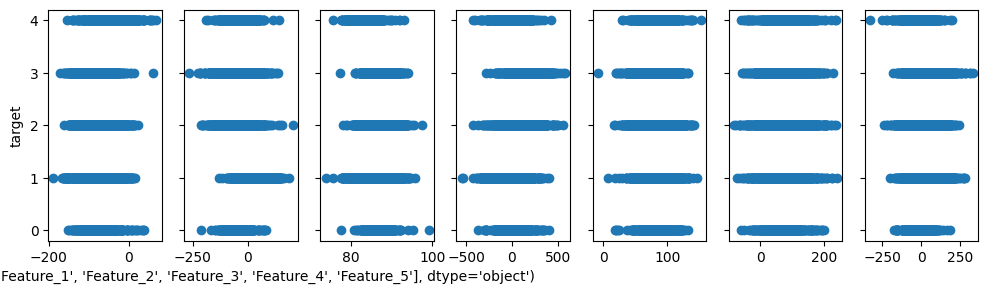

In [ ]:
import os
import pandas as pd

import copy, math
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('multi_classification_train.csv')


X_train = df.iloc[1:4000,1:-2]
y_train = df.iloc[1:4000,-1]
X_features = df.columns[1:6]


fig,ax=plt.subplots(1, 7, figsize=(12, 3), sharey=True)
for i in range(7):
    ax[i].scatter(X_train.iloc[:,i],y_train)
ax[1].set_xlabel(X_features)
ax[0].set_ylabel("target")
plt.show()


X_test = df.iloc[4000:,1:-2]
y_test = df.iloc[4000:,-1]

[0 1 2 3 4]
Iteration    0: Cost 0.7268722847006094   
Iteration  100: Cost 0.7161559277644902   
Iteration  200: Cost 0.7162692671582386   
Iteration  300: Cost 0.7163086902888123   
Iteration  400: Cost 0.7163275237951833   
Iteration  500: Cost 0.7163380190541644   
Iteration  600: Cost 0.7163442771762571   
Iteration  700: Cost 0.7163481106552098   
Iteration  800: Cost 0.7163504826016751   
Iteration  900: Cost 0.7163519554961175   

updated parameters: w:[-5.51492809e-04  1.18965356e-04  4.47037145e-04  1.35229597e-04
  1.08769083e-04 -1.15871333e-04 -4.66253621e-04 -2.15985650e-04
  7.89929655e-04 -2.80631681e-04 -5.63249889e-06 -2.90181355e-04
  2.16221983e-04 -5.97829057e-05 -6.83314859e-04  3.28532314e-04
  2.13734698e-04 -6.78928694e-06 -1.10051787e-04], b:5.212469142196296e-06


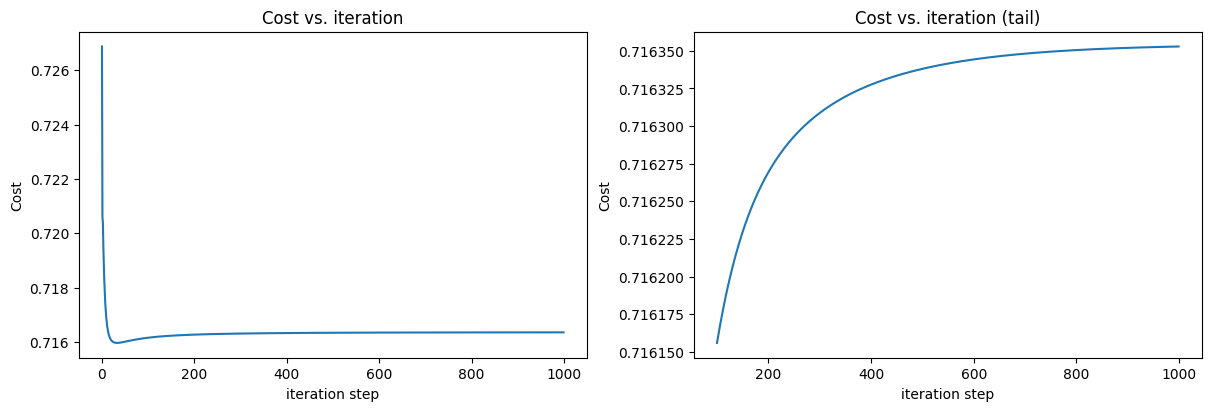

prediction: 0.5030000294818515, target value: 0
prediction: 0.5154493800143607, target value: 0
prediction: 0.46589386354807455, target value: 0
prediction: 0.5297144609438608, target value: 0
prediction: 0.4725121073000352, target value: 0
prediction: 0.4977480287379655, target value: 0
prediction: 0.5398139089350295, target value: 0
prediction: 0.5487952271204769, target value: 0
prediction: 0.5179829220086355, target value: 0
prediction: 0.5540634315619848, target value: 0
prediction: 0.5150609790872008, target value: 0
prediction: 0.5336220229505291, target value: 0
prediction: 0.519636788539639, target value: 0
prediction: 0.5356223373584101, target value: 0
prediction: 0.5089875495331306, target value: 0
prediction: 0.5706586793594872, target value: 0
prediction: 0.5355672446100745, target value: 0
prediction: 0.5313460521072338, target value: 0
prediction: 0.5572690752155747, target value: 1
prediction: 0.5002489987351798, target value: 0
prediction: 0.5961571544693419, target v

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def one_hot_encoding(y):
    unique_labels = np.unique(y)
    return unique_labels

print(one_hot_encoding(y_train))

for i in range(len(one_hot_encoding(y_train))):
    df[f'new_column_{i}'] = np.where(df['Class'] == i, 1, 0)

X_train = df.iloc[1:4000,1:-7]
y_train = df.iloc[1:4000,-6]
OHE_columns = df.iloc[1:4000, -6:]

# Running logistic regression on each class

# CLASS 1 [0]

y_train_class_1 = df.new_column_0[1:4000]

def compute_cost_logistic(X, y, w, b,gama):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    z = sigmoid(np.dot(X,w) + b)
    cost = np.array(-y*np.log(z) - (1-y)*np.log(1-z))

    cost = cost.sum() + (gama/2)*np.sum(w**2)
    return cost/m

def compute_gradient_logistic(X, y, w, b,gama):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m +  (gama / m) * w
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters,gama):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, gama)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b, gama) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

w_tmp  = np.zeros(X_train.shape[1])
b_tmp  = 0.
alph = 10**(-4.8)
lambda_ = 0.00001
iters = 1000

w_out_1, b_out_1, J_hist= gradient_descent(X_train, y_train_class_1, w_tmp, b_tmp, alph, iters,lambda_)
print(f"\nupdated parameters: w:{w_out_1}, b:{b_out_1}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()


for i in range(len(y_train_class_1)):
    print(f"prediction: {sigmoid(np.dot(X_train.iloc[i],w_out_1)+b_out_1)}, target value: {y_train_class_1.iloc[i]}")



Iteration    0: Cost 0.7420909943781492   
Iteration  100: Cost 0.671548758288942   
Iteration  200: Cost 0.6715280531195686   
Iteration  300: Cost 0.6715312371121633   
Iteration  400: Cost 0.6715394715066686   
Iteration  500: Cost 0.6715475069669944   
Iteration  600: Cost 0.6715537046289821   
Iteration  700: Cost 0.6715580232833629   
Iteration  800: Cost 0.67156088232233   
Iteration  900: Cost 0.6715627236386663   

updated parameters: w:[-1.04389445e-03  2.16532475e-03  6.92273961e-04 -7.14094196e-04
  1.70289985e-04 -4.58405414e-05  4.47995908e-04  5.34746351e-04
 -1.04886082e-03  5.80155613e-04  6.56173496e-04  1.47842581e-03
  9.44762403e-04  3.53823286e-04 -2.45384185e-04  2.67325888e-04
  8.28769026e-05  1.01604359e-03 -2.63753823e-05], b:8.209136079315304e-06


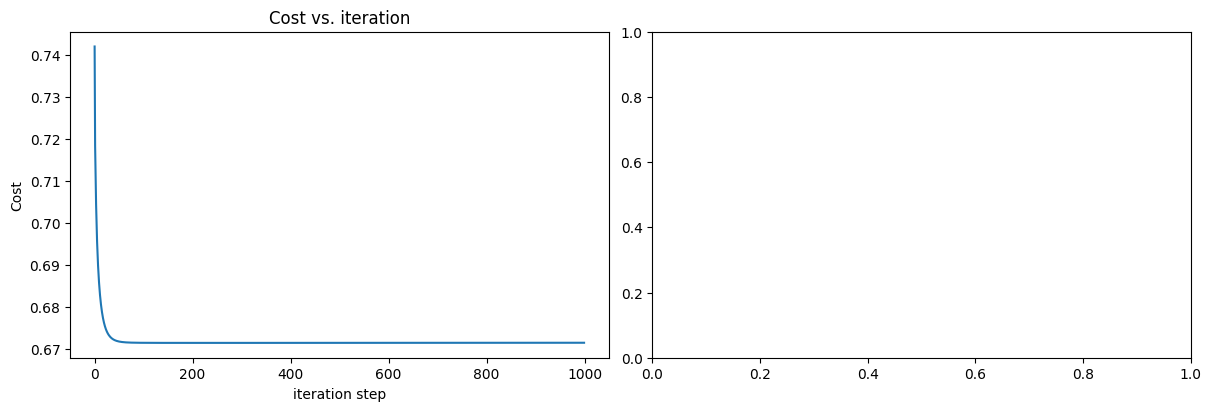

prediction: 0.5996553307924776, target value: 0
prediction: 0.4728890393795398, target value: 0
prediction: 0.49185707749240754, target value: 0
prediction: 0.5301245261151334, target value: 0
prediction: 0.6466422307021363, target value: 1
prediction: 0.5492734654704875, target value: 0
prediction: 0.490836742388735, target value: 0
prediction: 0.6843260383125881, target value: 1
prediction: 0.5094551450181741, target value: 0
prediction: 0.4942324733967463, target value: 0
prediction: 0.5091938222703715, target value: 0
prediction: 0.5078996755749264, target value: 0
prediction: 0.5339852142849855, target value: 0
prediction: 0.48451880680973725, target value: 0
prediction: 0.6779509176755631, target value: 1
prediction: 0.6767709257524783, target value: 1
prediction: 0.48554115667005626, target value: 0
prediction: 0.5095101259387644, target value: 0
prediction: 0.5537668126351317, target value: 0
prediction: 0.4273065991173048, target value: 0
prediction: 0.5009385281624933, target

In [ ]:
# CLASS 2 [1]
y_train_class_2 = df.new_column_1[1:4000]

def compute_cost_logistic(X, y, w, b,gama):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    z = sigmoid(np.dot(X,w) + b)
    cost = np.array(-y*np.log(z) - (1-y)*np.log(1-z))

    cost = cost.sum() + (gama/2)*np.sum(w**2)
    return cost/m

def compute_gradient_logistic(X, y, w, b,gama):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m +  (gama / m) * w
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters,gama):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, gama)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b, gama) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

w_tmp  = np.zeros(X_train.shape[1])
b_tmp  = 0.
alph = 10**(-4.8)
lambda_ = 0.0000001
iters = 1000

w_out_2, b_out_2, J_hist= gradient_descent(X_train, y_train_class_2, w_tmp, b_tmp, alph, iters,lambda_)
print(f"\nupdated parameters: w:{w_out_2}, b:{b_out_2}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)

ax1.set_title("Cost vs. iteration");
ax1.set_ylabel('Cost')             ;
ax1.set_xlabel('iteration step')   ;
plt.show()


for i in range(len(y_train_class_1)):
    print(f"prediction: {sigmoid(np.dot(X_train.iloc[i],w_out_2)+b_out_2)}, target value: {y_train_class_2.iloc[i]}")



Iteration    0: Cost 0.7470532648856064   
Iteration  100: Cost 0.6518884829793045   
Iteration  200: Cost 0.6510360820676919   
Iteration  300: Cost 0.6509729526265547   
Iteration  400: Cost 0.6509829856821575   
Iteration  500: Cost 0.6509973509385475   
Iteration  600: Cost 0.6510077855085424   
Iteration  700: Cost 0.651014582099839   
Iteration  800: Cost 0.6510188805932353   
Iteration  900: Cost 0.6510215731178755   

updated parameters: w:[-1.04389437e-03  2.16532470e-03  6.92273906e-04 -7.14094198e-04
  1.70290074e-04 -4.58405168e-05  4.47995910e-04  5.34746359e-04
 -1.04886083e-03  5.80155604e-04  6.56173477e-04  1.47842579e-03
  9.44762354e-04  3.53823303e-04 -2.45384166e-04  2.67325886e-04
  8.28769398e-05  1.01604349e-03 -2.63754296e-05], b:8.209144552286315e-06


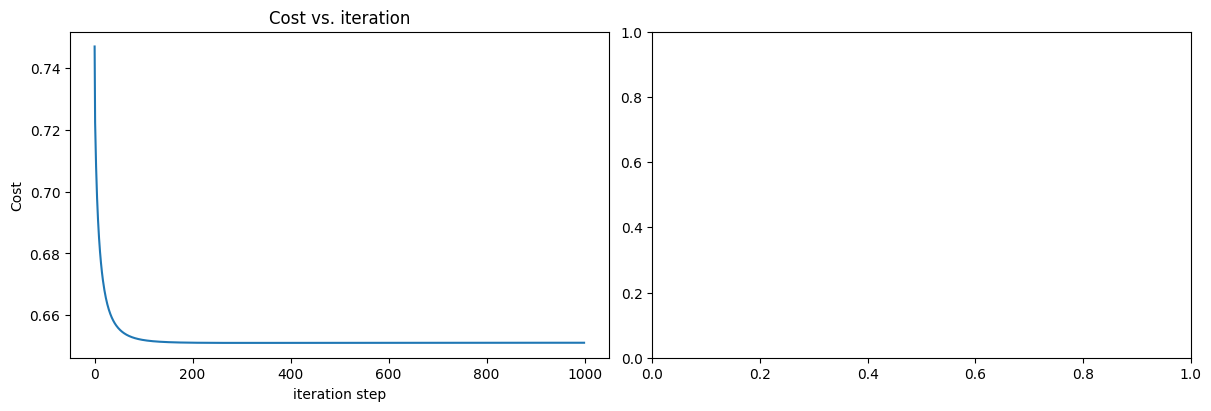

In [ ]:
# CLASS 3 [2]
y_train_class_3 = df.new_column_2[1:4000]

def compute_cost_logistic(X, y, w, b,gama):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    z = sigmoid(np.dot(X,w) + b)
    cost = np.array(-y*np.log(z) - (1-y)*np.log(1-z))

    cost = cost.sum() + (gama/2)*np.sum(w**2)
    return cost/m

def compute_gradient_logistic(X, y, w, b,gama):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m +  (gama / m) * w
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters,gama):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, gama)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b, gama) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

w_tmp  = np.zeros(X_train.shape[1])
b_tmp  = 0.
alph = 10**(-4.8)
lambda_ = 0.3
iters = 1000

w_out_3, b_out_3, J_hist= gradient_descent(X_train, y_train_class_3, w_tmp, b_tmp, alph, iters,lambda_)
print(f"\nupdated parameters: w:{w_out_2}, b:{b_out_2}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)

ax1.set_title("Cost vs. iteration");
ax1.set_ylabel('Cost')             ;
ax1.set_xlabel('iteration step')   ;
plt.show()

Iteration    0: Cost 0.7522506425289891   
Iteration  100: Cost 0.7013195360346284   
Iteration  200: Cost 0.7011652826399435   
Iteration  300: Cost 0.7011300401704542   
Iteration  400: Cost 0.701123102399294   
Iteration  500: Cost 0.7011238093103497   
Iteration  600: Cost 0.7011260610274104   
Iteration  700: Cost 0.7011281217264642   
Iteration  800: Cost 0.7011296423705337   
Iteration  900: Cost 0.7011306738827587   

updated parameters: w:[-1.04389437e-03  2.16532470e-03  6.92273906e-04 -7.14094198e-04
  1.70290074e-04 -4.58405168e-05  4.47995910e-04  5.34746359e-04
 -1.04886083e-03  5.80155604e-04  6.56173477e-04  1.47842579e-03
  9.44762354e-04  3.53823303e-04 -2.45384166e-04  2.67325886e-04
  8.28769398e-05  1.01604349e-03 -2.63754296e-05], b:8.209144552286315e-06


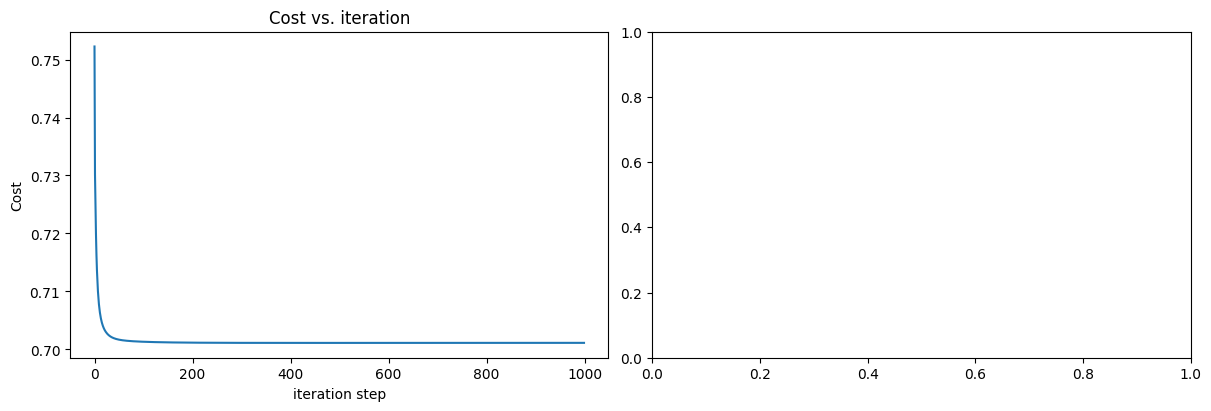

In [ ]:
# CLASS 4 [3]
y_train_class_4 = df.new_column_3[1:4000]

def compute_cost_logistic(X, y, w, b,gama):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    z = sigmoid(np.dot(X,w) + b)
    cost = np.array(-y*np.log(z) - (1-y)*np.log(1-z))

    cost = cost.sum() + (gama/2)*np.sum(w**2)
    return cost/m

def compute_gradient_logistic(X, y, w, b,gama):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m +  (gama / m) * w
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters,gama):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, gama)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b, gama) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

w_tmp  = np.zeros(X_train.shape[1])
b_tmp  = 0.
alph = 10**(-4.8)
lambda_ = 0.3
iters = 1000

w_out_4, b_out_4, J_hist= gradient_descent(X_train, y_train_class_4, w_tmp, b_tmp, alph, iters,lambda_)
print(f"\nupdated parameters: w:{w_out_2}, b:{b_out_2}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)

ax1.set_title("Cost vs. iteration");
ax1.set_ylabel('Cost')             ;
ax1.set_xlabel('iteration step')   ;
plt.show()

Iteration    0: Cost 0.7317259066191898   
Iteration  100: Cost 0.7065775074749308   
Iteration  200: Cost 0.7055282506513811   
Iteration  300: Cost 0.7053171499567487   
Iteration  400: Cost 0.705268805005058   
Iteration  500: Cost 0.7052615258742388   
Iteration  600: Cost 0.7052641540016281   
Iteration  700: Cost 0.7052681821327339   
Iteration  800: Cost 0.7052715115498595   
Iteration  900: Cost 0.7052738695508055   

updated parameters: w:[-1.04389437e-03  2.16532470e-03  6.92273906e-04 -7.14094198e-04
  1.70290074e-04 -4.58405168e-05  4.47995910e-04  5.34746359e-04
 -1.04886083e-03  5.80155604e-04  6.56173477e-04  1.47842579e-03
  9.44762354e-04  3.53823303e-04 -2.45384166e-04  2.67325886e-04
  8.28769398e-05  1.01604349e-03 -2.63754296e-05], b:8.209144552286315e-06


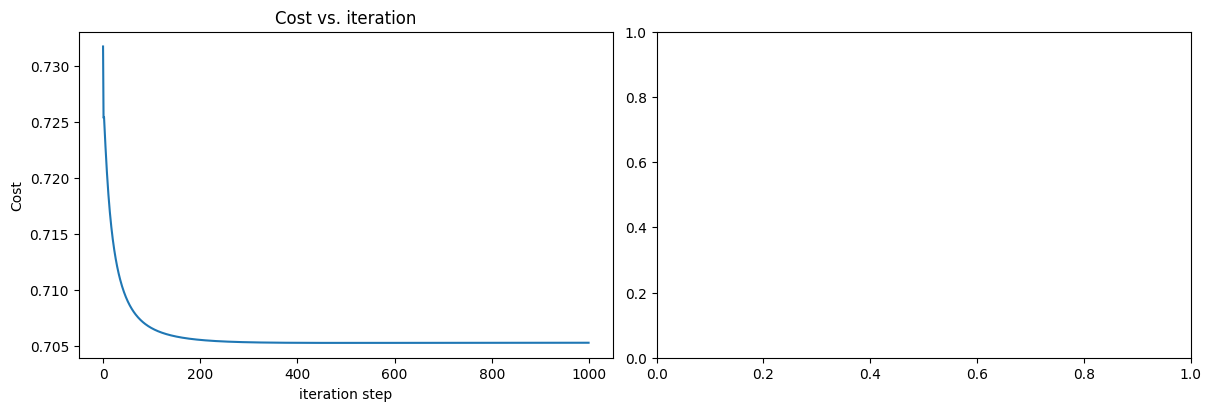

In [ ]:
# CLASS 5 [4]
y_train_class_5 = df.new_column_4[1:4000]

def compute_cost_logistic(X, y, w, b,gama):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    z = sigmoid(np.dot(X,w) + b)
    cost = np.array(-y*np.log(z) - (1-y)*np.log(1-z))

    cost = cost.sum() + (gama/2)*np.sum(w**2)
    return cost/m

def compute_gradient_logistic(X, y, w, b,gama):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m +  (gama / m) * w
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters,gama):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, gama)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b, gama) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

w_tmp  = np.zeros(X_train.shape[1])
b_tmp  = 0.
alph = 10**(-4.8)
lambda_ = 0.3
iters = 1000

w_out_5, b_out_5, J_hist= gradient_descent(X_train, y_train_class_5, w_tmp, b_tmp, alph, iters,lambda_)
print(f"\nupdated parameters: w:{w_out_2}, b:{b_out_2}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)

ax1.set_title("Cost vs. iteration");
ax1.set_ylabel('Cost')             ;
ax1.set_xlabel('iteration step')   ;
plt.show()

In [ ]:
# CALCULATING THE PROBABILITY

probability = np.zeros((len(X_train),5))
w = [w_out_1,w_out_2,w_out_3,w_out_4,w_out_5]
b = [b_out_1,b_out_2,b_out_3,b_out_4,b_out_5]

# Initialize sum_ with zeros to store the accumulated probabilities
sum_ = np.zeros((X_train.shape[0], len(w)))

# Iterate over each set of weights and biases
for i in range(len(w)):
    # Calculate the sigmoid of the dot product for the current class
    sum_[:, i] = np.exp(np.dot(X_train, w[i]) + b[i])

# Calculate probabilities for each class by normalizing over rows
for i in range(len(one_hot_encoding(y_train))):
    probability[:, i] = sum_[:, i] / np.sum(sum_, axis=1)

print(probability[:30,:])
 [0.18613602 0.15296774 0.22377337 0.28821133 0.14891154]






[[0.15679863 0.23205893 0.31667855 0.17243691 0.12202697]
 [0.16231577 0.13688979 0.28877106 0.11995653 0.29206684]
 [0.13409131 0.14879703 0.3531388  0.18447938 0.17949348]
 [0.17992191 0.18021833 0.29611878 0.16143468 0.18230631]
 [0.13928947 0.28455568 0.27303628 0.14071643 0.16240214]
 [0.15559335 0.19132804 0.32457061 0.17616708 0.15234093]
 [0.18613602 0.15296774 0.22377337 0.28821133 0.14891154]
 [0.18556923 0.33074526 0.10557587 0.2216706  0.15643904]
 [0.17469495 0.16883192 0.21954853 0.21241989 0.22450472]
 [0.19919809 0.15666757 0.24683475 0.24395422 0.15334537]
 [0.16943248 0.1655001  0.29926017 0.18151413 0.18429311]
 [0.18511039 0.16697805 0.26195436 0.19911912 0.18683808]
 [0.17437189 0.18470381 0.19106783 0.27496474 0.17489173]
 [0.17999565 0.14668053 0.30151921 0.13147913 0.24032549]
 [0.16241668 0.32983152 0.15641946 0.19059039 0.16074195]
 [0.20651923 0.32532544 0.12344977 0.1749715  0.16973406]
 [0.17445165 0.14277735 0.14909478 0.38184075 0.15183547]
 [0.18209493 0

In [ ]:
for i in range(probability.shape[0]):
    # Find the index of the maximum element in the current row
    max_col_index = np.argmax(probability[i])

    # Get the maximum element in the current row
    max_element = probability[i, max_col_index]

    # Print the maximum element and its column index
    print(f"Row {i}: Max element = {max_element}, Column index = {max_col_index}, Target value : { y_train.iloc[i]}")

Row 0: Max element = 0.31667855233162967, Column index = 2, Target value : 2
Row 1: Max element = 0.292066840461975, Column index = 4, Target value : 4
Row 2: Max element = 0.35313879698651374, Column index = 2, Target value : 2
Row 3: Max element = 0.2961187831803259, Column index = 2, Target value : 2
Row 4: Max element = 0.284555682717151, Column index = 1, Target value : 1
Row 5: Max element = 0.32457060972188784, Column index = 2, Target value : 2
Row 6: Max element = 0.288211334054573, Column index = 3, Target value : 3
Row 7: Max element = 0.33074525759936674, Column index = 1, Target value : 1
Row 8: Max element = 0.22450471742422978, Column index = 4, Target value : 4
Row 9: Max element = 0.24683475316925915, Column index = 2, Target value : 2
Row 10: Max element = 0.2992601714540157, Column index = 2, Target value : 2
Row 11: Max element = 0.2619543630473952, Column index = 2, Target value : 2
Row 12: Max element = 0.2749647420191554, Column index = 3, Target value : 3
Row 13

In [ ]:
# calculating accuracy

count = 0

for i in range(probability.shape[0]):
  if max_col_index == y_train.iloc[i]:
    count += 1
print(f" correct pred: {count}, total prediction: {probability.shape[0]}")

 correct pred: 930, total prediction: 3999
